In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import interpolate
from scipy import integrate
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import sqrt

### Derive form for ODE in way that can be solved.
Starting with 16 
\begin{equation}
    -\xi \frac{dT_e}{d\xi} = \frac{d^2 T_e^{n+4}}{d\xi^2} + \beta e \gamma_0 (T_i-T_e)
\end{equation}
define u
$$u(\xi) = T'(\xi)  $$
$$\frac{d^2 T_e^{n+4}}{d \xi} = (n+4) T_e(\xi)^{n+2} \left((n+3) u^2+T_e(\xi) u'(\xi)\right).$$

16 becomes 
\begin{equation}
    -\xi u = (n+4) T_e(\xi)^{n+2} \left((n+3) u^2+T_e(\xi) u'(\xi)\right) + B_e(T_i-T_e)
\end{equation}
Solving for u'
$
\begin{equation}
     \frac{-\xi u - B_e(T_i-T_e)}{(n+4)T_e^{n+2}}-(n+3)u^2 = T_e(\xi)u'(\xi)
\end{equation}
Simplifying 
\begin{equation}
    u' = -\frac{\frac{(\xi u + B_e(Ti-T_e))T_e^{-n} }{n+4} + (n+3)u^2T_e^2}{T_e^3}
\end{equation}
Finding the derivative of Ti
\begin{equation}\label{eq:17}
    \xi \frac{dT_i}{d\xi} = \beta_i\gamma_0(T_i-T_e)
\end{equation}
\begin{equation}
    Ti' = \frac{B_i(T_i-T_e)}{\xi}
\end{equation}

### Find initial conditions
Te initial conditions zero order 
\begin{equation}
    T_e^0(\xi) = \bigg{(}\frac{(n+3)}{(n+4)}\xi_{\mathrm{max}}({\xi_{\mathrm{max}}}-\xi)\bigg{)}^{1/(n+3)}
\end{equation}
The derivative of this equation is 
\begin{equation}
    \frac{dT_e^0}{d\xi} = -\bigg{(}\frac{(n+3)}{(n+4)}\xi_{\mathrm{max}}\bigg{)}^{1/(n+3)}\bigg{(}\frac{(\xi_{\mathrm{max}}-\xi)}{n+3}\bigg{)}^{(2-n)/(n+3)}
\end{equation}
Initial conditions for Ti from 33
\begin{equation}
    T^0_i(\xi)= B_i\frac{(n+3)}{(n+4)}(\xi_{\mathrm{max}}-\xi)T_e^0(\xi)
\end{equation}

### Test Problem
$$ B_e = \beta_e\gamma_0$$
$$\beta_e = \frac{1}{\rho C_{ve}}$$
$$C_{ve} = 0.1\rho, C_{vi} = 0.05\rho [GJcm^{-3}keV^{-1}]$$
$$\gamma_0 = 3.0GJ/(cm^3keV-ns)$$
$$\rho = 3.0 g cm^{-3}$$

### Timestep
$$ A = \frac{1}{2\alpha} $$
$$ \alpha = \frac{ac}{3} \frac{4}{n+4} \frac{1}{\kappa_0} \frac{1}{\rho C_{ve}} $$
Using the A defined in Petshek paper
$$ A^2 = \frac{1}{2K}$$
$$m = n+4$$
$$ K = \frac{ac}{3} \frac{4}{n+4} \frac{1}{\kappa_0} \frac{1}{ C_{ve}\rho^{2}} $$
$$ a = 0.01372 GJKeV^{-4} cm^{-3}$$-Wolbier paper
$$ c = 29.9792458 (cm ns^{-1}) $$
$$ \frac{\xi\sqrt{\tau}}{A}=x $$

In [2]:
g = lambda x, xmax: ((n+3)*xmax*(-x+xmax)/(n+4))**(1/(n+3))
gprime = lambda x, xmax: -(((n+3)/(n+4))*xmax)**(1/(n+3))*1/(n+3)*(xmax-x)**((-2-n)/(n+3))
h = lambda x, xmax: Bi*((n+3)/(n+4))*(xmax-x)*((n+3)/(n+4)*xmax*(xmax-x))**(1/(n+3))

In [3]:
#V[0] = Te, V[1] = u, v[2] = Ti
RHSfun = lambda t,v: np.array([v[1], 
                               ((-t*v[1] - Be*(v[2]-v[0]))*(v[0]**(-n))/(n+4)-(n+3)*(v[1]**2)*(v[0]**2))/(v[0]**3), 
                               Bi*(v[2]-v[0])/t])



In [56]:
n = 3
c=299.792458
xmax = 1.12
a=0.01372
kappa0= 100
tol = 1e-3
Cve=0.1
Cvi=.05
rho = 3.0
gamma0 = 1.0
K = a*c*4/(3*(n+4)*kappa0*Cve*rho**2)
A = sqrt(1/(2*K))
print("A = ",A)
Betae=1/(rho*Cve)
Betai=1/(rho*Cvi)
Bi = Betae*gamma0
Be = Betai*gamma0
IC = [g(xmax-tol,xmax),gprime(xmax-tol,xmax), h(xmax-tol,xmax)]
output = integrate.DOP853(RHSfun, xmax,IC,0)
print(Bi, Be, Betai, Betae,n)

A =  7.578766058136872
3.333333333333333 6.666666666666666 6.666666666666666 3.333333333333333 3


In [57]:

opt_fun = lambda xm: integrate.solve_ivp(RHSfun, (xm-tol,0), [g(xm-tol,xm),gprime(xm-tol,xm), h(xm-tol,xm)], 
                                         method='DOP853', max_step = 1e-4).y[0][-1] - 1

In [58]:
from scipy import optimize
minval = optimize.brentq(opt_fun, .5,1.5)
print(minval)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


0.7647859303039829


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


0.03191107158684247
0.07135532530304185
0.10091166879110586


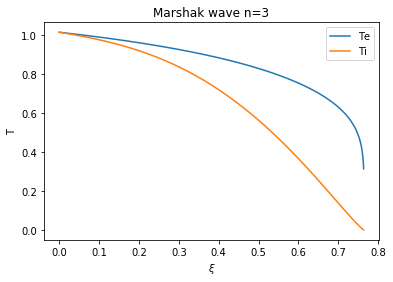

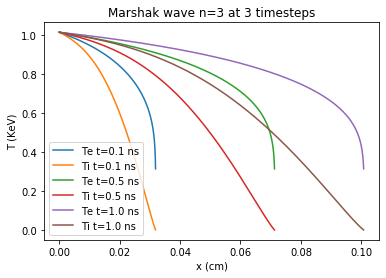

In [59]:
sol = integrate.solve_ivp(RHSfun, (minval-tol,0), IC, method='DOP853', max_step = 1e-4)
plt.figure(1)
plt.plot(sol.t, sol.y[0], label="Te")
plt.plot(sol.t, sol.y[2], label ="Ti")
plt.legend()
plt.xlabel(r"$\xi$")
plt.ylabel("T")
plt.title("Marshak wave n=%i" %(n))
plt.show
plt.figure(2)
for tau in [0.1,0.5,1]:#,5,10]:
    z=sqrt(tau)/A
    print(z*minval)
    plt.plot(sol.t*z, sol.y[0], label="Te t=%.1f ns"% (tau))
    plt.plot(sol.t*z, sol.y[2], label ="Ti t=%.1f ns"% (tau))
    plt.legend()
    plt.xlabel("x (cm)")
    plt.ylabel("T (KeV)")
    plt.title("Marshak wave n=%i at 3 timesteps" %(n))
    np.savetxt("MarshakTimes_n%d_t%1.2f_Bi%1.3f_Be%1.3f.csv" % (n,tau,Bi,Be), sol.t*z, delimiter=",")
    np.savetxt("MarshakTi_n%d_t%1.2f_Bi%1.3f_Be%1.3f.csv" % (n,tau,Bi,Be), sol.y[2], delimiter=",")
    np.savetxt("MarshakTe_n%d_t%1.2f_Bi%1.3f_Be%1.3f.csv" % (n,tau,Bi,Be), sol.y[0], delimiter=",")
plt.show()

In [11]:
"MarshakTimesn%d_t%1.2f_Bi%1.3f_Be%1.3f.csv" % (n,tau,Bi,Be)

'MarshakTimesn2_t1.00_Bi0.17_Be0.33.csv'